In [34]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [35]:
dataset = pd.read_csv('Datasets/feature_dataset.csv')

dataset = dataset.reset_index()

col_names = [ 
    "Home Team ELO", "Away Team ELO", "Home XG", "Away XG", 
    "Home XGA", "Away XGA", "Home Win Percentage", "Home Draw Percentage", 
    "Away Win Percentage", "Away Draw Percentage", "Head2Head Win", 
    "Head2Head Draw", "Winner"
]

dataset = dataset[col_names]
dataset.head()

,Home Team ELO,Away Team ELO,Home XG,Away XG,Home XGA,Away XGA,Home Win Percentage,Home Draw Percentage,Away Win Percentage,Away Draw Percentage,Head2Head Win,Head2Head Draw,Winner
0,1676,1521,54.21,33.84,40.90,55.94,64.50,20.64,29.82,28.95,0,0,-1
1,1485,1520,38.63,37.45,53.75,51.46,24.01,26.97,26.52,25.10,0,0,0
2,1462,1692,48.21,44.89,56.39,46.18,27.27,29.22,36.44,28.54,0,0,0
3,1509,1680,46.69,57.40,52.39,57.04,32.51,25.29,39.62,25.83,0,0,-1
4,1420,1434,45.73,65.26,32.79,46.99,30.42,24.58,21.05,26.32,0,0,-1


Accuracy: 0.5555555555555556

Feature Weights for Logistic Regression:
Home Team ELO: 0.0002742641260900119
Away Team ELO: 1.7114177726806002e-05
Home XG: -0.016323470158374938
Away XG: 0.01256584866765732
Home XGA: 0.019884733178214924
Away XGA: -0.018317754305124032
Home Win Percentage: -0.015516035863868719
Home Draw Percentage: 0.005140674026146315
Away Win Percentage: 0.002538682271025683
Away Draw Percentage: -0.00889840051490717
Head2Head Win: 0.005109732533476889
Head2Head Draw: -0.001607175565692702


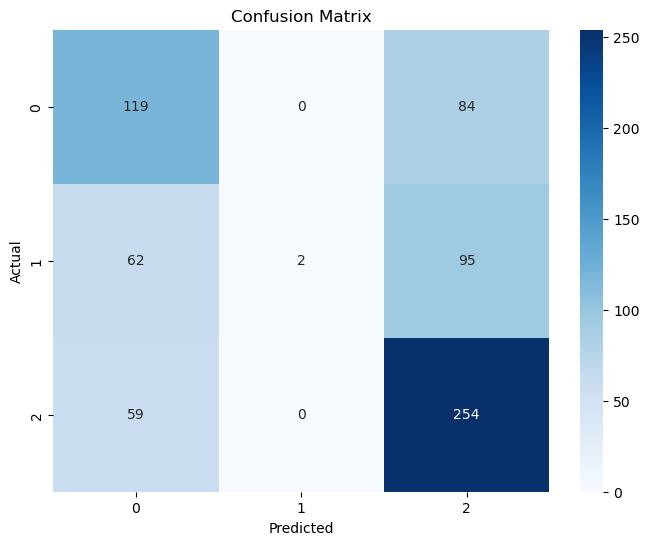

In [36]:
X = dataset.drop('Winner', axis=1)
y = dataset['Winner']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

logistic_regression_model = LogisticRegression(random_state=16, max_iter=10000, solver='saga')

logistic_regression_model.fit(X_train, y_train)

y_pred = logistic_regression_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

feature_weights = logistic_regression_model.coef_[0]
features = X.columns


print("\nFeature Weights for Logistic Regression:")
for feature, weight in zip(features, feature_weights):
    print(f"{feature}: {weight}")


from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)

import matplotlib.pyplot as plt
import seaborn as sns

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cnf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

SVM Accuracy: 0.5525925925925926

Feature Weights for SVM (Linear Kernel):
Home Team ELO: 3.30059218195284e-05
Away Team ELO: 1.7195703876965892e-05
Home XG: -0.009207634277113845
Away XG: 0.006946899294630651
Home XGA: 0.011860853126952849
Away XGA: -0.011863609207598803
Home Win Percentage: -0.007884600624496264
Home Draw Percentage: 0.0007853858136916191
Away Win Percentage: 0.0016511095731049229
Away Draw Percentage: -0.007028765488220295
Head2Head Win: 0.0028980909558770722
Head2Head Draw: -0.0011002984796749133


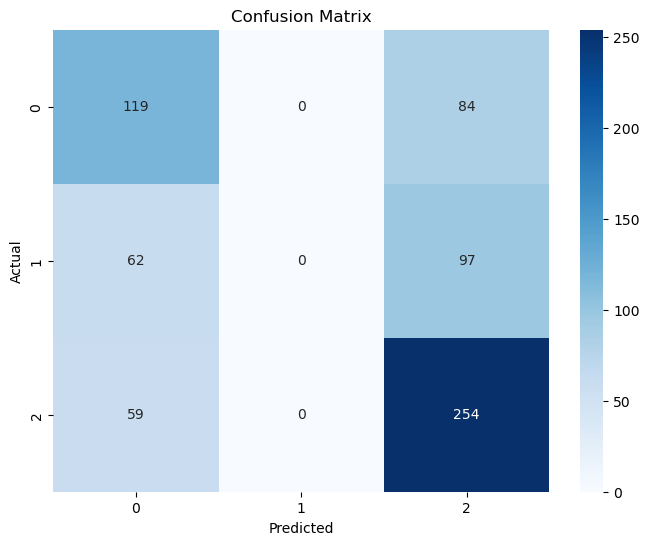

In [37]:
from sklearn.svm import SVC, LinearSVC
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

# Initialize the Linear SVM model
svm_model = LinearSVC(random_state=16, max_iter=10000)

# Train the model
svm_model.fit(X_train, y_train)

# Predict on the test set
y_pred_svm = svm_model.predict(X_test)

# Calculate accuracy
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print('SVM Accuracy:', accuracy_svm)

# Get feature weights from Linear SVM
feature_weights = svm_model.coef_[0]
features = X.columns

print("\nFeature Weights for SVM (Linear Kernel):")
for feature, weight in zip(features, feature_weights):
    print(f"{feature}: {weight}")

# Confusion matrix
cnf_matrix = metrics.confusion_matrix(y_test, y_pred_svm)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cnf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

Decision Tree Accuracy: 0.5777777777777777

Feature Importances:
                 Feature  Importance
4               Home XGA    0.138496
3                Away XG    0.132870
2                Home XG    0.112273
8    Away Win Percentage    0.105261
1          Away Team ELO    0.095620
7   Home Draw Percentage    0.083003
5               Away XGA    0.075299
0          Home Team ELO    0.073978
6    Home Win Percentage    0.066580
9   Away Draw Percentage    0.057844
10         Head2Head Win    0.033836
11        Head2Head Draw    0.024941


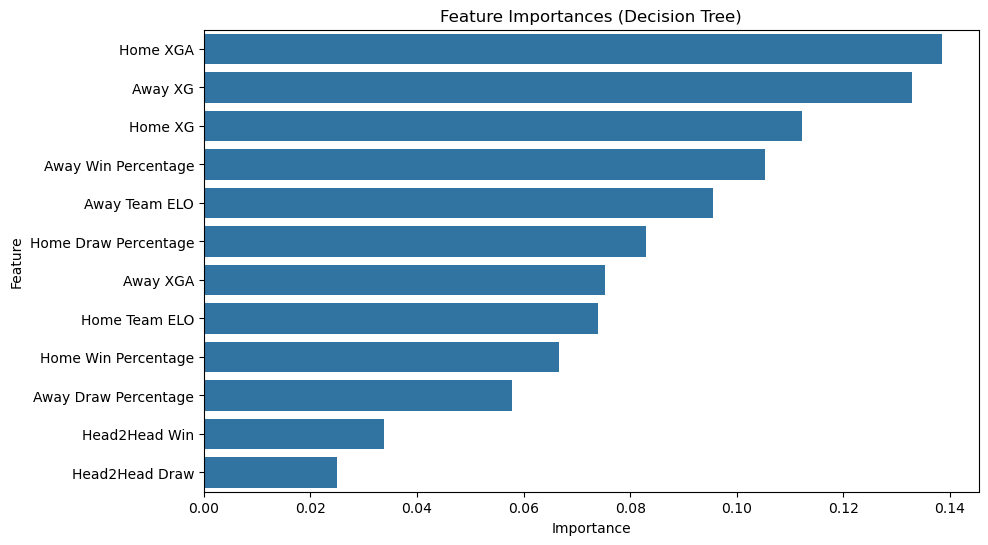

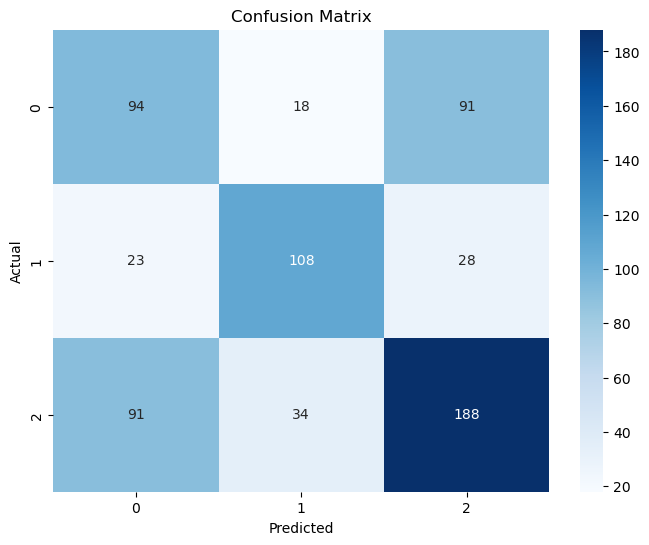

In [38]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Initialize the Decision Tree model
decision_tree_model = DecisionTreeClassifier(random_state=16)

# Train the model
decision_tree_model.fit(X_train, y_train)

# Predict on the test set
y_pred_dt = decision_tree_model.predict(X_test)

# Calculate accuracy
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print('Decision Tree Accuracy:', accuracy_dt)

# Get feature importances
feature_importances = decision_tree_model.feature_importances_
features = X.columns

# Display feature importances
importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

print("\nFeature Importances:")
print(importance_df)

# Plot the top most important features
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importances (Decision Tree)')
plt.show()

# Confusion matrix
cnf_matrix = metrics.confusion_matrix(y_test, y_pred_dt)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cnf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

Random Forest Accuracy: 0.6785185185185185

Random Forest Feature Importances:
                 Feature  Importance
4               Home XGA    0.139843
3                Away XG    0.134781
1          Away Team ELO    0.095618
8    Away Win Percentage    0.087414
0          Home Team ELO    0.086255
2                Home XG    0.083836
6    Home Win Percentage    0.082068
5               Away XGA    0.081795
9   Away Draw Percentage    0.067686
7   Home Draw Percentage    0.066701
10         Head2Head Win    0.038181
11        Head2Head Draw    0.035822


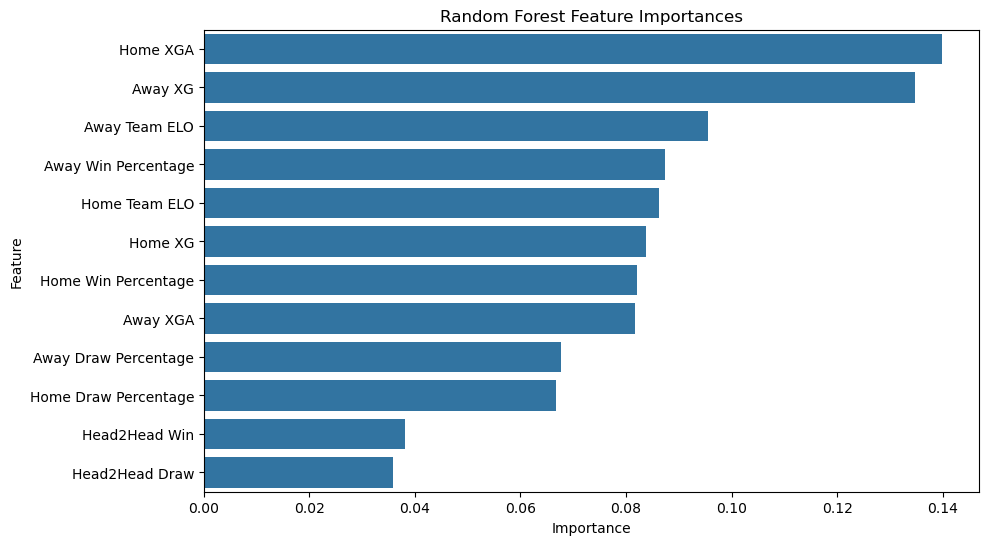

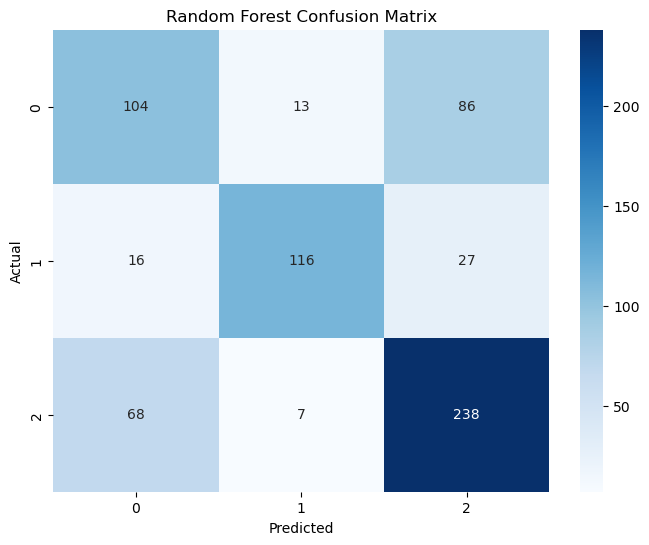

In [39]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Initialize the Random Forest model
random_forest_model = RandomForestClassifier(random_state=16, n_estimators=1000)

# Train the model
random_forest_model.fit(X_train, y_train)

# Predict on the test set
y_pred_rf = random_forest_model.predict(X_test)

# Calculate accuracy
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print('Random Forest Accuracy:', accuracy_rf)

# Get feature importances
feature_importances_rf = random_forest_model.feature_importances_
features = X.columns

# Display feature importances
importance_df_rf = pd.DataFrame({
    'Feature': features,
    'Importance': feature_importances_rf
}).sort_values(by='Importance', ascending=False)

print("\nRandom Forest Feature Importances:")
print(importance_df_rf)

# Plot the top most important features
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df_rf)
plt.title('Random Forest Feature Importances')
plt.show()

# Confusion matrix for Random Forest
cnf_matrix_rf = metrics.confusion_matrix(y_test, y_pred_rf)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cnf_matrix_rf, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Random Forest Confusion Matrix')
plt.show()